## Data Wrangling Project

In [2]:
# load necessary libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

### Step `1` - *Gathering Data*
+ Importing `twitter-archive-enhanced.csv`

In [293]:
# load file
arch = pd.read_csv('twitter-archive-enhanced.csv')

In [294]:
# load twitter-archive-enhanced.csv
arch.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


+ Downloading the img Prediction 

In [295]:
#Gathering from the server
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

open('image_prediction.tsv', 'wb').write(response.content) # save it

335079

In [296]:
# load image_prediction.tsv
img_predict = pd.read_csv('image_prediction.tsv', sep='\t')
img_predict.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0,True,collie,0,True,Shetland_sheepdog,0,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,1,True,miniature_pinscher,0,True,Rhodesian_ridgeback,0,True


+ Getting Tweet Data <BR>
<font color=red> Unfortunately, I have not received e-mail for a week to get the approval </font> 

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [297]:
tweet_ids = arch.tweet_id.values
len(tweet_ids)

2356

In [298]:
import json
df_json = []
with open('tweet-json.txt') as file:
    for line in file:
        df_json.append(json.loads(line))

In [10]:
print(df_json[0:2])

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'medi

In [299]:
#Convert json to a dataframe
tweet = pd.DataFrame(df_json , columns=['id','retweet_count','favorite_count'])

In [300]:
tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [301]:
tweet.rename(columns={'id':'tweet_id'},inplace=True)

### Step `2` - *Assessing Data*
> Assessing twitter-archive-enhanced

In [302]:
arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [303]:
arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2356,78,78,181,181,2356,2356
mean,742771590321719808,745507917855750656,20141706360873208,772039961038007040,12416983653017580,13,10
std,68567047444761032,75824920044192880,125279666255236320,62369278105055600,95992535331517536,46,7
min,666020888022790144,665814696700723200,11856342,666104133288665088,783214,0,0
25%,678398938214475776,675741911993464832,308637449,718631497683582976,4196983835,10,10
50%,719627934716235776,703870840226598912,4196983835,780465709297995776,4196983835,11,10
75%,799337304954252288,825780371286566912,4196983835,820314633777061888,4196983835,12,10
max,892420643555336192,886266357075128320,840547864354918400,887473957103951872,787461778435289088,1776,170


In [304]:
arch.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,nan,nan,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,nan,nan,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [17]:
arch.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1141,7.276450e+17,NaN,NaN,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727644517...,13,10,None,doggo,None,None,None
1532,6.900050e+17,NaN,NaN,2016-01-21 02:56:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I'm the only one that ever does anything in t...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690005060...,10,10,None,None,None,None,None
373,8.283770e+17,NaN,NaN,2017-02-05 22:55:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Beebop. Her name means ""Good Dog"" in r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828376505...,13,10,Beebop,None,None,None,None
1387,7.005050e+17,NaN,NaN,2016-02-19 02:20:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaia. She's just cute as hell. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700505138...,12,10,Kaia,None,None,None,None
2182,6.689920e+17,NaN,NaN,2015-11-24 03:19:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harrison. He braves the snow like a ch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668992363...,8,10,Harrison,None,None,None,None
1811,6.768200e+17,NaN,NaN,2015-12-15 17:42:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Watch out Airbud. This pupper is also good at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676819651...,12,10,None,None,None,pupper,None
223,8.494120e+17,NaN,NaN,2017-04-05 00:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Noosh. He noticed you were in the show...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849412302...,12,10,Noosh,None,None,None,None
1208,7.157050e+17,NaN,NaN,2016-04-01 00:58:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bentley. He gives kisses back. 11/10 p...,NaN,NaN,NaN,https://vine.co/v/ijAlDnuOD0l,11,10,Bentley,None,None,None,None


In [305]:
arch['rating_denominator'].describe()

count   2356
mean      10
std        7
min        0
25%       10
50%       10
75%       10
max      170
Name: rating_denominator, dtype: float64

In [306]:
arch.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Fabio         1
Peanut        1
Swagger       1
Jomathan      1
Durg          1
Name: name, Length: 957, dtype: int64

In [307]:
arch[arch['rating_denominator']==0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [308]:
arch[arch['rating_denominator'] != 10].count()[0]

23

> Assessing image_prediction.tsv

In [309]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [310]:
img_predict.tail(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0,True,Pekinese,0,True,papillon,0,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0,False,bagel,0,False,banana,0,False


In [311]:
img_predict.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0,True,collie,0,True,Shetland_sheepdog,0,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,1,True,miniature_pinscher,0,True,Rhodesian_ridgeback,0,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,1,True,malinois,0,True,bloodhound,0,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0,True,redbone,0,True,miniature_pinscher,0,True


In [312]:
img_predict.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,1,True,Labrador_retriever,0,True,redbone,0,True
1137,728986383096946689,https://pbs.twimg.com/media/Ch3hOGWUYAE7w0y.jpg,2,Maltese_dog,1,True,toy_poodle,0,True,miniature_poodle,0,True
1647,808733504066486276,https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg,1,seat_belt,1,False,toy_poodle,0,True,golden_retriever,0,True
1207,742161199639494656,https://pbs.twimg.com/media/CkyvqnNWYAQxQY1.jpg,1,balloon,1,False,punching_bag,0,False,parachute,0,False
740,687312378585812992,https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg,1,seat_belt,1,False,Great_Dane,0,True,Weimaraner,0,True
1623,803638050916102144,https://pbs.twimg.com/ext_tw_video_thumb/80363...,1,Labrador_retriever,0,True,golden_retriever,0,True,Great_Pyrenees,0,True
228,670385711116361728,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1,whippet,0,True,Chesapeake_Bay_retriever,0,True,beagle,0,True
1946,862457590147678208,https://pbs.twimg.com/media/C_gQmaTUMAAPYSS.jpg,1,home_theater,0,False,studio_couch,0,False,barber_chair,0,False
478,675334060156301312,https://pbs.twimg.com/media/CV9EvZNUwAAgLCK.jpg,2,Pembroke,1,True,Cardigan,0,True,chow,0,True
1777,828381636999917570,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,1,Bedlington_terrier,0,True,Labrador_retriever,0,True,clumber,0,True


In [313]:
img_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2075,2075,2075,2075,2075
mean,738451357852539008,1,1,0,0
std,67852033330235656,1,0,0,0
min,666020888022790144,1,0,0,0
25%,676483507139540992,1,0,0,0
50%,711998809858043904,1,1,0,0
75%,793203448525178880,1,1,0,0
max,892420643555336192,4,1,0,0


> Assessing tweet-json.txt

In [314]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality Issues
`twitter-archive-enhanced.csv` 
+ Invalid  tweet_id column (data type)
+ Invalid  timestamp column (data type)
+ Replace the value 'None' to standard NaN
+ There replies and retweets we don't need it
+ Drop unnecessary columns from archive table

`image_prediction.tsv`
+ Missing data (2075 instead of 2356)
+ Some p* columns values mixed between uppercase and lowercase
+ Underscore used in p* columns instead of a space 

`tweet-json.txt` 
+ Missing Data 2354 instead of 2356

### Tidiness Issues
+ Dog stage should be in one column called dog_type
+ Data is related but sparate into 3 tables

### Step `3` - *Cleaning Data*
#### First creating copies

In [370]:
c_arch = arch.copy()
c_tweet = tweet.copy()
c_img_predict= img_predict.copy()

### *Cleaning Tidiness Issues*

`-` Data is related but sparate into 3 tables

<font size=3 color=red><b>Define</b></font>

Merge all data into one based on tweet_id column

<font size=3 color=orange><b>Code</b></font>

In [371]:
c_arch = pd.merge(c_arch, c_img_predict,
                        how = 'left', on = 'tweet_id')
c_arch = pd.merge(c_arch, c_tweet,
                        how = 'left', on = 'tweet_id')

<font size=3 color=green><b>Test</b></font>

In [372]:
c_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

----------


`-` Dog stage should be in one column called dog_stage

<font size=3 color=red><b>Define</b></font>

Merge 4 columns into one column called dog_stage

<font size=3 color=orange><b>Code</b></font>

In [373]:
#get name of dog from text column
c_arch['dog_stage'] = c_arch['text'].str.extract('(doggo|floofer|pupper|puppo)')

<font size=3 color=green><b>Test</b></font>

In [374]:
c_arch['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

---

### *Cleaning Quality Issues*


`-` Invalid tweet_id column (data type should be string)

<font size=3 color=red><b>Define</b></font>

Convert Invalid tweet_id datatype to  string

<font size=3 color=orange><b>Code</b></font>

In [375]:
#Convert to string
c_arch.tweet_id = c_arch.tweet_id.astype(str)

<font size=3 color=green><b>Test</b></font>

In [376]:
c_arch.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
jpg_url                        object
img_num                       float64
p1                             object
p1_conf                       float64
p1_dog                         object
p2                             object
p2_conf                       float64
p2_dog                         object
p3                             object
p3_conf     

`-` Invalid timestamp column (data type is string)

<font size=3 color=red><b>Define</b></font>

Convert Invalid timestamp datatype to  datetime

<font size=3 color=orange><b>Code</b></font>

In [377]:
c_arch.timestamp = pd.to_datetime(c_arch.timestamp)

<font size=3 color=green><b>Test</b></font>

In [378]:
c_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

`-` Replace the value 'None' to standard NaN 

<font size=3 color=red><b>Define</b></font>

Replace the value 'None' with NaN (missing value)

<font size=3 color=orange><b>Code</b></font>

In [379]:
c_arch =  c_arch.replace('None', np.nan)

<font size=3 color=green><b>Test</b></font>

In [380]:
c_arch.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
1924,674075285688614912,nan,nan,2015-12-08 03:57:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mitch. He thinks that's a hat. No...,nan,nan,NaN,https://twitter.com/dog_rates/status/674075285...,...,True,Kerry_blue_terrier,0,True,Lakeland_terrier,0,True,316,1047,NaN
114,870656317836468226,nan,nan,2017-06-02 15:00:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cody. He zoomed too aggressively and t...,nan,nan,NaN,https://www.gofundme.com/help-fix-codys-torn-a...,...,True,Cardigan,0,True,beagle,0,True,2817,12819,NaN
1699,680970795137544192,nan,nan,2015-12-27 04:37:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I thought I made this very clear. We only rate...,nan,nan,NaN,https://twitter.com/dog_rates/status/680970795...,...,True,whippet,0,True,quilt,0,False,749,2665,NaN


`-` Missing pictures ( 59 rows )

<font size=3 color=red><b>Define</b></font>

Drop rows without pictures


<font size=3 color=orange><b>Code</b></font>

In [381]:
c_arch['expanded_urls'].dropna(inplace=True)

<font size=3 color=green><b>Test</b></font>

In [382]:
c_arch['expanded_urls'].isna().sum()

0

In [383]:
c_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

`-` There replies and retweets we don't need it

<font size=3 color=red><b>Define</b></font>

Delete replies and retweets from in the archive table

<font size=3 color=orange><b>Code</b></font>

In [385]:
#chk for replyies
replies = (c_arch.in_reply_to_status_id.notnull())
replies.sum()

78

In [387]:
# Delete replies
c_arch = c_arch[~replies]

In [389]:
retweets = (c_arch.retweeted_status_user_id.notnull())
retweets.sum()
c_arch = c_arch[~retweets]

<font size=3 color=green><b>Test</b></font>

In [390]:
c_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

`-` Drop unnecessary columns from archive table


<font size=3 color=red><b>Define</b></font>

Delete coulmns


<font size=3 color=orange><b>Code</b></font>

In [391]:
c_arch = c_arch.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'])
c_arch=c_arch.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

<font size=3 color=green><b>Test</b></font>

In [392]:
c_arch.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
jpg_url                            object
img_num                           float64
p1                                 object
p1_conf                           float64
p1_dog                             object
p2                                 object
p2_conf                           float64
p2_dog                             object
p3                                 object
p3_conf                           float64
p3_dog                             object
retweet_count                     float64
favorite_count                    float64
dog_stage                          object
dtype: object

`-` Some p* columns values mixed between uppercase and lowercase


<font size=3 color=red><b>Define</b></font>

Convert to uppercase

<font size=3 color=orange><b>Code</b></font>

In [332]:
c_arch.p1 = c_arch.p1.str.title()
c_arch.p2 = c_arch.p2.str.title()
c_arch.p3 = c_arch.p3.str.title()

<font size=3 color=green><b>Test</b></font>

In [338]:
c_arch.p1.sample(5)

976     Standard_Poodle
1738            Mailbox
2186          Jellyfish
1643           Bluetick
2102       Ibizan_Hound
Name: p1, dtype: object

`-` Underscore used in p* columns instead of a space

<font size=3 color=red><b>Define</b></font>

Delete Underscore

<font size=3 color=orange><b>Code</b></font>

In [356]:
c_arch.p1=c_arch.p1.str.replace('_',' ')
c_arch.p2=c_arch.p2.str.replace('_',' ')
c_arch.p3=c_arch.p3.str.replace('_',' ')

<font size=3 color=green><b>Test</b></font>

In [369]:
c_arch.p3.sample(5)

1150                Bucket
1434       Norfolk Terrier
1843                Vizsla
1479                   NaN
2160    Miniature Pinscher
Name: p3, dtype: object

---
### *Storing Data*

In [393]:
c_arch.to_csv('twitter_archive_master.csv', index=False)

In [394]:
clean_archive = pd.read_csv('twitter_archive_master.csv')
clean_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0,False,banana,0,False,8853,39467,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0,True,papillon,0,True,6514,33819,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0,True,kelpie,0,True,4328,25461,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0,True,spatula,0,False,8964,42908,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0,True,German_short-haired_pointer,0,True,9774,41048,NaN


---
### *Data Visualization*

In [404]:
dogs_count = clean_archive.dog_stage.value_counts()

In [406]:
dogs_count

pupper     240
doggo       80
puppo       29
floofer      4
Name: dog_stage, dtype: int64

Text(0.5, 1.0, 'Popular dog stages')

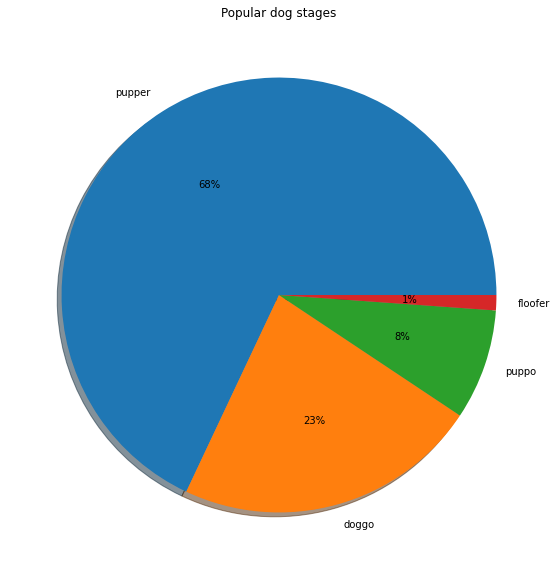

In [416]:
plt.subplots(figsize=(15, 10))
plt.pie(dogs_count , autopct='%1.0f%%', labels=['pupper','doggo','puppo','floofer'],shadow=True)
plt.title('Popular dog stages')


> **Insight:** pupper is popular dog while floofer is a rare and uncommon dog 

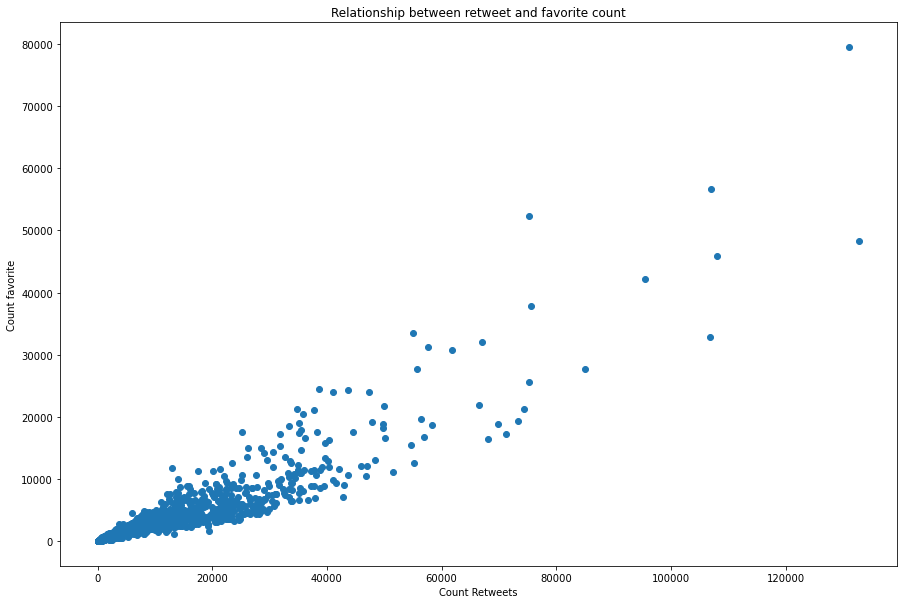

In [415]:
plt.subplots(figsize=(15, 10));
plt.scatter(clean_archive.favorite_count, clean_archive.retweet_count);
plt.title('Relationship between retweet and favorite count');
plt.xlabel('Count Retweets');
plt.ylabel('Count favorite');


> **Insight:** Direction is positive and moderate strength